In [52]:
from glob import glob

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import auc

In [53]:
tasks = ["greater-than", "acronyms", "ioi"]
ablation_scheme = "zero"

In [54]:
df = []
for task in tasks:
    df_temp = []
    for path in glob(f"roc_results/{task}_{ablation_scheme}_*.csv"):
        df_temp.append(pd.read_csv(path))
    df_temp = pd.concat(df_temp)
    df_temp["Task"] = task
    df.append(df_temp)
df = pd.concat(df)

In [55]:
df

,threshold,TPR,FPR,Task
0,0.000010,1.000000,1.000000,greater-than
1,0.000016,1.000000,1.000000,greater-than
2,0.000026,1.000000,1.000000,greater-than
3,0.000042,1.000000,0.948529,greater-than
4,0.000067,1.000000,0.941176,greater-than
...,...,...,...,...
25,0.204336,0.347826,0.148760,ioi
26,0.303920,0.260870,0.074380,ioi
27,0.452035,0.173913,0.033058,ioi
28,0.672336,0.130435,0.008264,ioi


In [56]:
df_mean = df.groupby(["threshold", "Task"]).mean().sort_values(by="FPR").reset_index()

In [57]:
aucs = []
for task in tasks:
    df_temp = df_mean[df_mean["Task"] == task]
    aucs.append(auc(df_temp["FPR"].values, df_temp["TPR"].values))

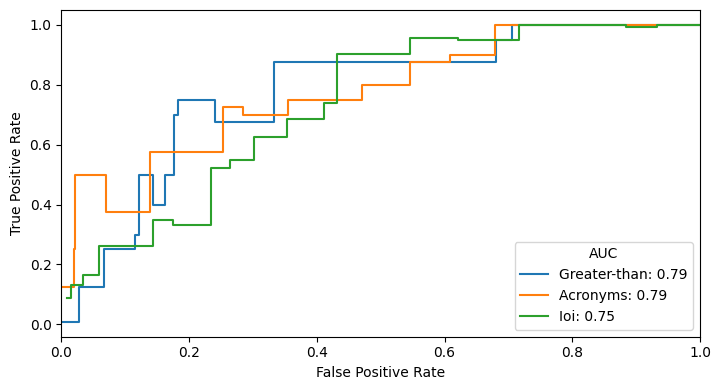

In [58]:
ratio = 1.8
plt.figure(figsize=(ratio*4, 4))
ax = sns.lineplot(df_mean, x="FPR", y="TPR", hue="Task", drawstyle="steps-post", 
                  errorbar=None, hue_order=tasks)
ax.set_ylabel("True Positive Rate")
ax.set_xlabel("False Positive Rate")
plt.legend(title="AUC", loc="lower right", labels=[f"{task.capitalize()}: {x:.2f}" for task, x in zip(tasks, aucs)])
#plt.legend()
plt.tight_layout()
ax.set_xlim([0, 1])
plt.savefig(f"images/ROC_{ablation_scheme}.pdf")